In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

In [2]:
df = pd.read_csv('../sat.trn',header=None,sep = '\s')

In [3]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
y[y==7] = 6
for i in range(6):
    y[y == (i + 1)] = i

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(6)]
list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    print(digit, len(li))

0 1072
1 479
2 961
3 415
4 470
5 1038


In [6]:
def get_winner(class1, class2):
    
    numbers = [*range(6)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 20)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-satellite2")
    [stats, winner] = run(config_path)
    
    return winner

In [7]:
winner_list = []

for class1 in range(0,5):
    for class2 in range(class1+1,6):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

number of class1:1072
number of class2:479

 ****** Running generation 0 ****** 

Population's average fitness: 0.39766 stdev: 0.19097
Best fitness: 0.96325 - size: (2, 7) - species 4 - id 70
Average adjusted fitness: 0.351
Mean genetic distance 2.806, standard deviation 0.472
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 6.287 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.50070 stdev: 0.22573
Best fitness: 0.97679 - size: (3, 7) - species 1 - id 285
Average adjusted fitness: 0.440
Mean genetic distance 2.915, standard deviation 0.494
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 5.475 sec (5.881 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54942 stdev: 0.23598
Best fitness: 0.97679 - size: (3, 7) - species 22 - id 285
Average adjusted fitness: 0.483
Mean genetic distance 2.990, standard deviation 0.499
Population of 199 members in 30 species
Total extinctions

Population's average fitness: 0.52942 stdev: 0.10895
Best fitness: 0.97245 - size: (2, 7) - species 7 - id 546
Average adjusted fitness: 0.469
Mean genetic distance 2.945, standard deviation 0.492
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 5.435 sec (5.169 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.52949 stdev: 0.10696
Best fitness: 0.97245 - size: (2, 7) - species 7 - id 546
Average adjusted fitness: 0.434
Mean genetic distance 2.944, standard deviation 0.493
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 5.485 sec (5.221 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.53758 stdev: 0.10553
Best fitness: 0.97245 - size: (2, 7) - species 7 - id 546
Average adjusted fitness: 0.423
Mean genetic distance 2.993, standard deviation 0.501
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 5.597 sec (5.275 average)

 ****** Running ge

Population's average fitness: 0.61051 stdev: 0.21877
Best fitness: 0.95763 - size: (2, 6) - species 9 - id 223
Average adjusted fitness: 0.405
Mean genetic distance 3.000, standard deviation 0.550
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 4.141 sec (3.966 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58876 stdev: 0.23531
Best fitness: 0.95763 - size: (2, 6) - species 9 - id 223
Average adjusted fitness: 0.541
Mean genetic distance 2.995, standard deviation 0.548
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 4.161 sec (3.985 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58659 stdev: 0.23841
Best fitness: 0.95763 - size: (2, 6) - species 9 - id 223
Average adjusted fitness: 0.453
Mean genetic distance 2.966, standard deviation 0.525
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 4.129 sec (4.054 average)

 ****** Running g

Population's average fitness: 0.59570 stdev: 0.21209
Best fitness: 0.94812 - size: (4, 11) - species 10 - id 511
Average adjusted fitness: 0.374
Mean genetic distance 3.032, standard deviation 0.500
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 4.665 sec (4.537 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60111 stdev: 0.21409
Best fitness: 0.94812 - size: (4, 11) - species 10 - id 511
Average adjusted fitness: 0.398
Mean genetic distance 3.035, standard deviation 0.495
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 5.427 sec (4.648 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59264 stdev: 0.21532
Best fitness: 0.94812 - size: (4, 11) - species 10 - id 511
Average adjusted fitness: 0.316
Mean genetic distance 3.020, standard deviation 0.493
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 4.795 sec (4.691 average)

 ****** Ru

Population's average fitness: 0.58397 stdev: 0.16017
Best fitness: 0.98389 - size: (3, 7) - species 21 - id 2598
Average adjusted fitness: 0.259
Mean genetic distance 3.115, standard deviation 0.540
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 6.735 sec (6.654 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58746 stdev: 0.16505
Best fitness: 0.98389 - size: (3, 7) - species 21 - id 2598
Average adjusted fitness: 0.426
Mean genetic distance 3.142, standard deviation 0.557
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 6.507 sec (6.621 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.58909 stdev: 0.16908
Best fitness: 0.98389 - size: (3, 7) - species 21 - id 2598
Average adjusted fitness: 0.522
Mean genetic distance 3.113, standard deviation 0.567
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 6.652 sec (6.644 average)
number of c

Population's average fitness: 0.52835 stdev: 0.14699
Best fitness: 0.96421 - size: (2, 7) - species 3 - id 163
Average adjusted fitness: 0.476
Mean genetic distance 3.010, standard deviation 0.521
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 2.263 sec (2.154 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53686 stdev: 0.16014
Best fitness: 0.96644 - size: (3, 9) - species 16 - id 533
Average adjusted fitness: 0.465
Mean genetic distance 3.030, standard deviation 0.538
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 2.419 sec (2.243 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57074 stdev: 0.17385
Best fitness: 0.96644 - size: (3, 9) - species 16 - id 533
Average adjusted fitness: 0.473
Mean genetic distance 3.048, standard deviation 0.527
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 2.487 sec (2.304 average)

 ****** Running 

Population's average fitness: 0.56989 stdev: 0.14110
Best fitness: 0.92729 - size: (3, 10) - species 3 - id 568
Average adjusted fitness: 0.326
Mean genetic distance 3.005, standard deviation 0.524
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 2.752 sec (2.651 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57520 stdev: 0.16360
Best fitness: 0.92729 - size: (3, 10) - species 27 - id 568
Average adjusted fitness: 0.454
Mean genetic distance 3.009, standard deviation 0.530
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 2.783 sec (2.670 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57775 stdev: 0.15459
Best fitness: 0.92729 - size: (3, 10) - species 27 - id 568
Average adjusted fitness: 0.430
Mean genetic distance 3.039, standard deviation 0.516
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 2.849 sec (2.692 average)

 ****** Runni

Population's average fitness: 0.69466 stdev: 0.24044
Best fitness: 0.98220 - size: (5, 12) - species 6 - id 1014
Average adjusted fitness: 0.638
Mean genetic distance 3.083, standard deviation 0.518
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 4.605 sec (4.751 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.70615 stdev: 0.24150
Best fitness: 0.98220 - size: (5, 12) - species 6 - id 1014
Average adjusted fitness: 0.661
Mean genetic distance 3.078, standard deviation 0.529
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 4.586 sec (4.763 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71119 stdev: 0.24842
Best fitness: 0.98220 - size: (5, 12) - species 4 - id 1014
Average adjusted fitness: 0.616
Mean genetic distance 3.137, standard deviation 0.526
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 4.630 sec (4.670 average)

 ****** Ru

Population's average fitness: 0.57938 stdev: 0.18116
Best fitness: 0.71148 - size: (4, 11) - species 10 - id 545
Average adjusted fitness: 0.309
Mean genetic distance 3.017, standard deviation 0.536
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 4.705 sec (3.979 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59502 stdev: 0.17336
Best fitness: 0.71148 - size: (4, 11) - species 10 - id 545
Average adjusted fitness: 0.281
Mean genetic distance 3.008, standard deviation 0.530
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 4.195 sec (4.028 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.56548 stdev: 0.18700
Best fitness: 0.71148 - size: (4, 11) - species 10 - id 545
Average adjusted fitness: 0.258
Mean genetic distance 3.017, standard deviation 0.552
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 4.182 sec (4.066 average)

 ****** Ru

Population's average fitness: 0.58426 stdev: 0.21576
Best fitness: 0.91055 - size: (8, 20) - species 27 - id 2521
Average adjusted fitness: 0.398
Mean genetic distance 3.166, standard deviation 0.494
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 4.757 sec (4.729 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.57392 stdev: 0.21772
Best fitness: 0.91055 - size: (8, 20) - species 27 - id 2521
Average adjusted fitness: 0.462
Mean genetic distance 3.205, standard deviation 0.495
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 4.926 sec (4.771 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59771 stdev: 0.21582
Best fitness: 0.91055 - size: (8, 20) - species 27 - id 2521
Average adjusted fitness: 0.409
Mean genetic distance 3.198, standard deviation 0.504
Population of 191 members in 34 species
Total extinctions: 0
Generation time: 4.871 sec (4.801 average)
number o

Population's average fitness: 0.51473 stdev: 0.05952
Best fitness: 0.74689 - size: (2, 7) - species 7 - id 29
Average adjusted fitness: 0.292
Mean genetic distance 2.951, standard deviation 0.510
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 2.239 sec (2.127 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52805 stdev: 0.05329
Best fitness: 0.80000 - size: (4, 9) - species 23 - id 427
Average adjusted fitness: 0.198
Mean genetic distance 3.012, standard deviation 0.532
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 2.332 sec (2.195 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.52752 stdev: 0.07092
Best fitness: 0.80000 - size: (4, 9) - species 23 - id 427
Average adjusted fitness: 0.292
Mean genetic distance 2.979, standard deviation 0.506
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 2.447 sec (2.258 average)

 ****** Running g

Population's average fitness: 0.61507 stdev: 0.17873
Best fitness: 0.72058 - size: (3, 8) - species 22 - id 852
Average adjusted fitness: 0.333
Mean genetic distance 3.013, standard deviation 0.583
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 3.988 sec (3.718 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62834 stdev: 0.16998
Best fitness: 0.72058 - size: (5, 12) - species 15 - id 1192
Average adjusted fitness: 0.349
Mean genetic distance 3.051, standard deviation 0.569
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 4.144 sec (3.779 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62029 stdev: 0.17431
Best fitness: 0.72058 - size: (5, 12) - species 15 - id 1192
Average adjusted fitness: 0.341
Mean genetic distance 3.075, standard deviation 0.585
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 4.265 sec (3.839 average)

 ****** Run


 ****** Running generation 9 ****** 

Population's average fitness: 0.61049 stdev: 0.17459
Best fitness: 0.87533 - size: (4, 11) - species 34 - id 794
Average adjusted fitness: 0.318
Mean genetic distance 2.968, standard deviation 0.460
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 5.014 sec (4.336 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62282 stdev: 0.16956
Best fitness: 0.87533 - size: (4, 11) - species 34 - id 794
Average adjusted fitness: 0.446
Mean genetic distance 2.993, standard deviation 0.456
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 4.581 sec (4.450 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63553 stdev: 0.16639
Best fitness: 0.88196 - size: (3, 9) - species 19 - id 1583
Average adjusted fitness: 0.405
Mean genetic distance 3.015, standard deviation 0.461
Population of 192 members in 42 species
Total extinctions: 0
Generation time

In [8]:
classes = []
for class1 in range(0,5):
    for class2 in range(class1+1, 6):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-satellite2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
test_df = pd.read_csv('../sat.tst',header=None,sep = '\s')

testX = test_df.iloc[:,:-1].to_numpy()
testy = test_df.iloc[:,-1].to_numpy()

# 7-> 6 and 1-6 -> 0:5
testy[testy==7] = 6
for i in range(6):
    testy[testy == (i + 1)] = i

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(6)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []
    
    test_X = testX[j]
    test_y = testy[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    
    
    return pred_outputs

In [12]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []

for j in range(2000):
    pred = []
    vote = [0,0,0,0,0,0]
    for i in range(15):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1 #1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [13]:
from random import randint
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [14]:
np.sum(list_P == testy)/2000

0.723

In [15]:
for i,p_value in enumerate(pred_value):
    print("#{} index:{} real:{}".format(i, p_value[0], testy[i]))

#0 index:[2] real:2
#1 index:[2] real:2
#2 index:[2] real:3
#3 index:[2] real:3
#4 index:[2] real:3
#5 index:[2] real:3
#6 index:[2] real:3
#7 index:[2] real:3
#8 index:[2] real:3
#9 index:[2] real:3
#10 index:[2] real:3
#11 index:[2] real:3
#12 index:[5] real:3
#13 index:[2] real:3
#14 index:[2] real:2
#15 index:[2] real:2
#16 index:[2] real:2
#17 index:[2] real:2
#18 index:[2] real:2
#19 index:[2] real:2
#20 index:[2] real:2
#21 index:[2] real:2
#22 index:[2] real:2
#23 index:[2] real:2
#24 index:[2] real:2
#25 index:[2] real:2
#26 index:[2] real:2
#27 index:[4] real:4
#28 index:[2] real:5
#29 index:[2] real:5
#30 index:[3 4] real:5
#31 index:[4] real:4
#32 index:[2] real:2
#33 index:[2] real:2
#34 index:[2] real:3
#35 index:[2] real:3
#36 index:[2] real:3
#37 index:[2] real:3
#38 index:[2] real:3
#39 index:[5] real:3
#40 index:[2] real:3
#41 index:[3] real:3
#42 index:[2] real:2
#43 index:[2] real:2
#44 index:[2] real:2
#45 index:[2] real:2
#46 index:[2] real:2
#47 index:[2] real:2


#487 index:[2 5] real:4
#488 index:[5] real:4
#489 index:[4] real:4
#490 index:[4] real:4
#491 index:[4] real:4
#492 index:[4] real:4
#493 index:[2 3] real:4
#494 index:[3 4] real:4
#495 index:[1] real:1
#496 index:[4] real:4
#497 index:[3 4] real:4
#498 index:[4] real:4
#499 index:[5] real:3
#500 index:[2] real:3
#501 index:[1] real:1
#502 index:[1] real:1
#503 index:[1] real:1
#504 index:[1] real:1
#505 index:[2] real:5
#506 index:[5] real:5
#507 index:[5] real:5
#508 index:[5] real:5
#509 index:[5] real:5
#510 index:[2] real:2
#511 index:[2] real:5
#512 index:[2] real:5
#513 index:[5] real:5
#514 index:[5] real:5
#515 index:[2 3] real:5
#516 index:[4] real:4
#517 index:[4] real:4
#518 index:[4] real:4
#519 index:[2 3 4] real:4
#520 index:[4] real:4
#521 index:[1] real:1
#522 index:[1] real:1
#523 index:[1] real:1
#524 index:[5] real:3
#525 index:[2] real:3
#526 index:[2] real:3
#527 index:[1] real:1
#528 index:[1] real:1
#529 index:[1] real:1
#530 index:[1] real:1
#531 index:[2] rea

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, testy)
print(cm)

[[428   1   4   0  15   0]
 [  2 206   1   0   7   0]
 [ 15   4 358 132  28 157]
 [  7   1   1  12  12   6]
 [  9  11   0   4 153  18]
 [  0   1  33  63  22 289]]


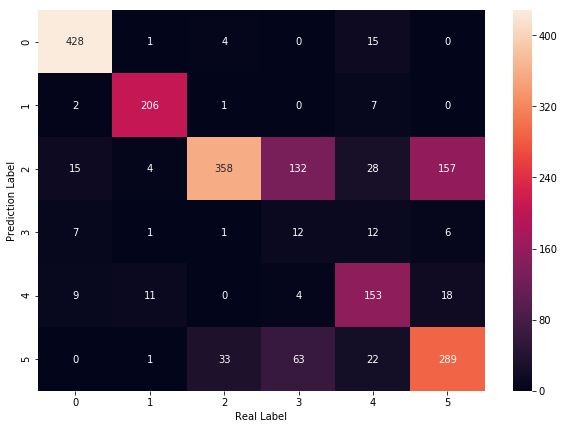

In [17]:
import seaborn as sn

df_cm = pd.DataFrame(cm, index = [i for i in "012345"],
                  columns = [i for i in "012345"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt='.20g', annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()